# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [115]:

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [117]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

#clean data
df = df[(df.value >= df.value.quantile(0.025)) &
   (df.value <= df.value.quantile(0.975)) ]

In [121]:

def draw_line_plot():
    # Draw line plot
    x = df.index
    y = df.value
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x,y, 'r', linewidth=1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


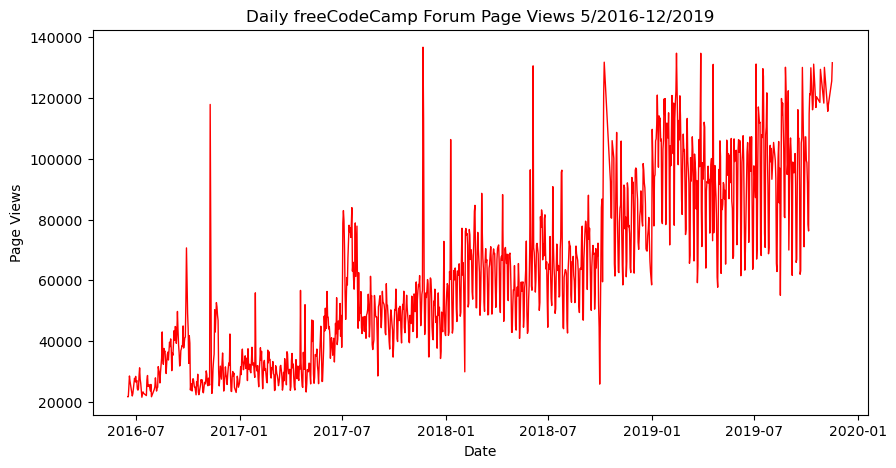

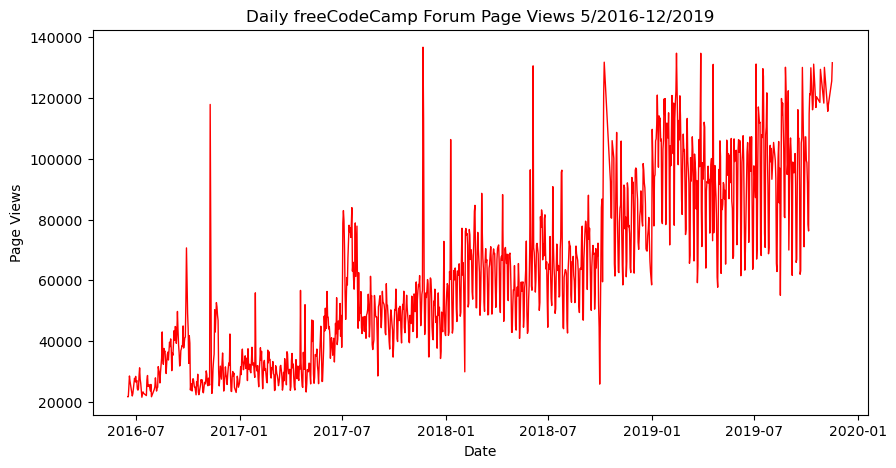

In [122]:
draw_line_plot()

In [123]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['month'] = df.index.month
    df_bar['year'] = df.index.year
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(12,8))
    df_bar.plot(kind='bar', ax=ax)
    plt.legend(title='Months',labels= ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'])
    plt.ylabel('Average Page Views')
    plt.xlabel('Years')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


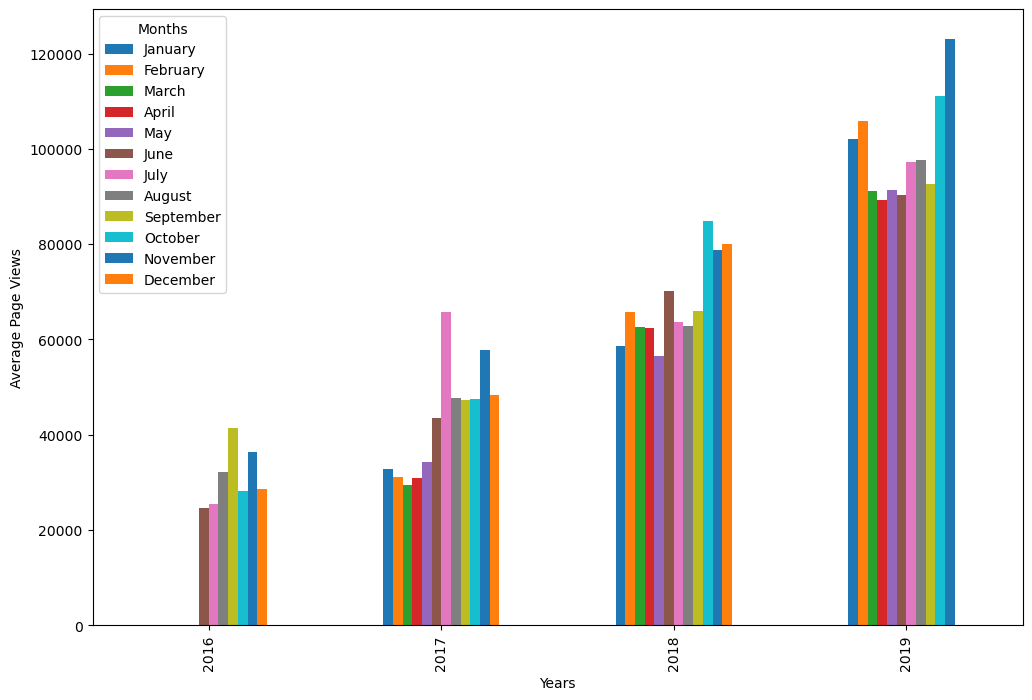

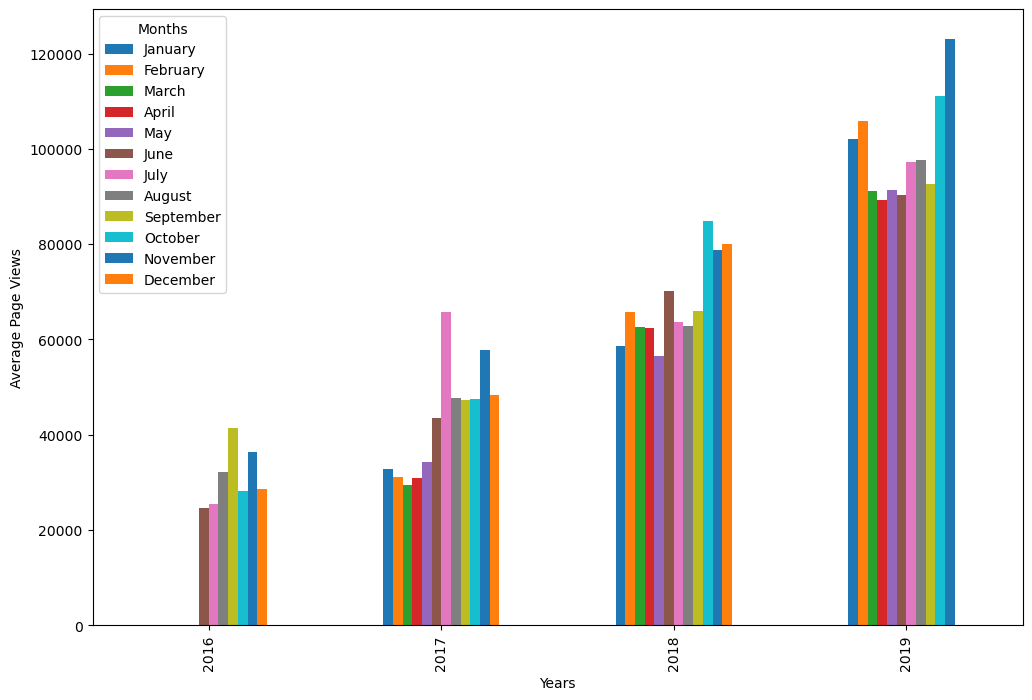

In [124]:
draw_bar_plot()

In [171]:

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.boxplot(data=df_box, x=df_box.year, y=df_box.value, ax=ax1)
    sns.boxplot(data=df_box, x='month', y=df_box.value, ax=ax2,
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    ax1.set_ylabel('Page Views')
    ax2.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax2.set_xlabel('Month')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax1.set_ylim([0,200000])
    ax2.set_ylim(0,200000)
    ax1.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])
    ax2.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])



    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


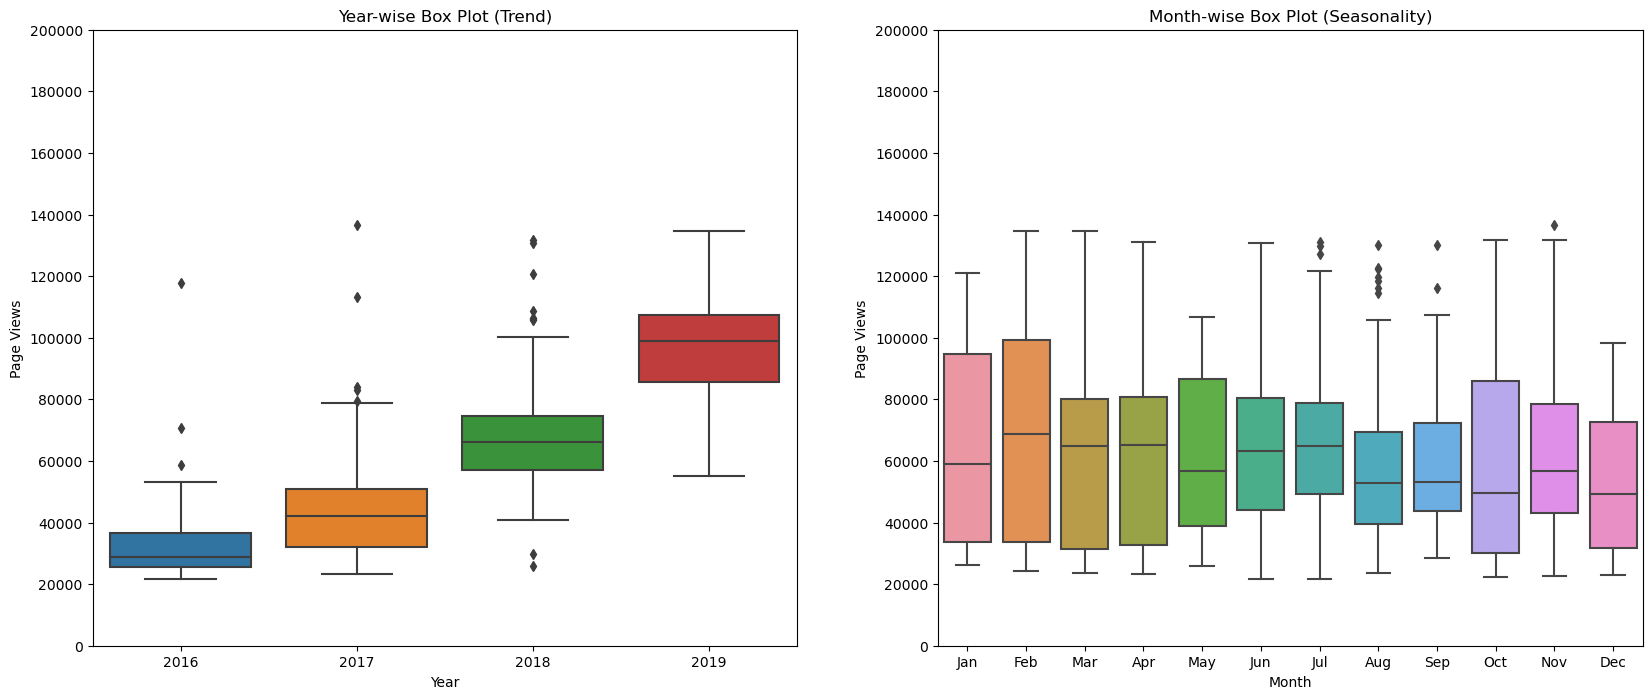

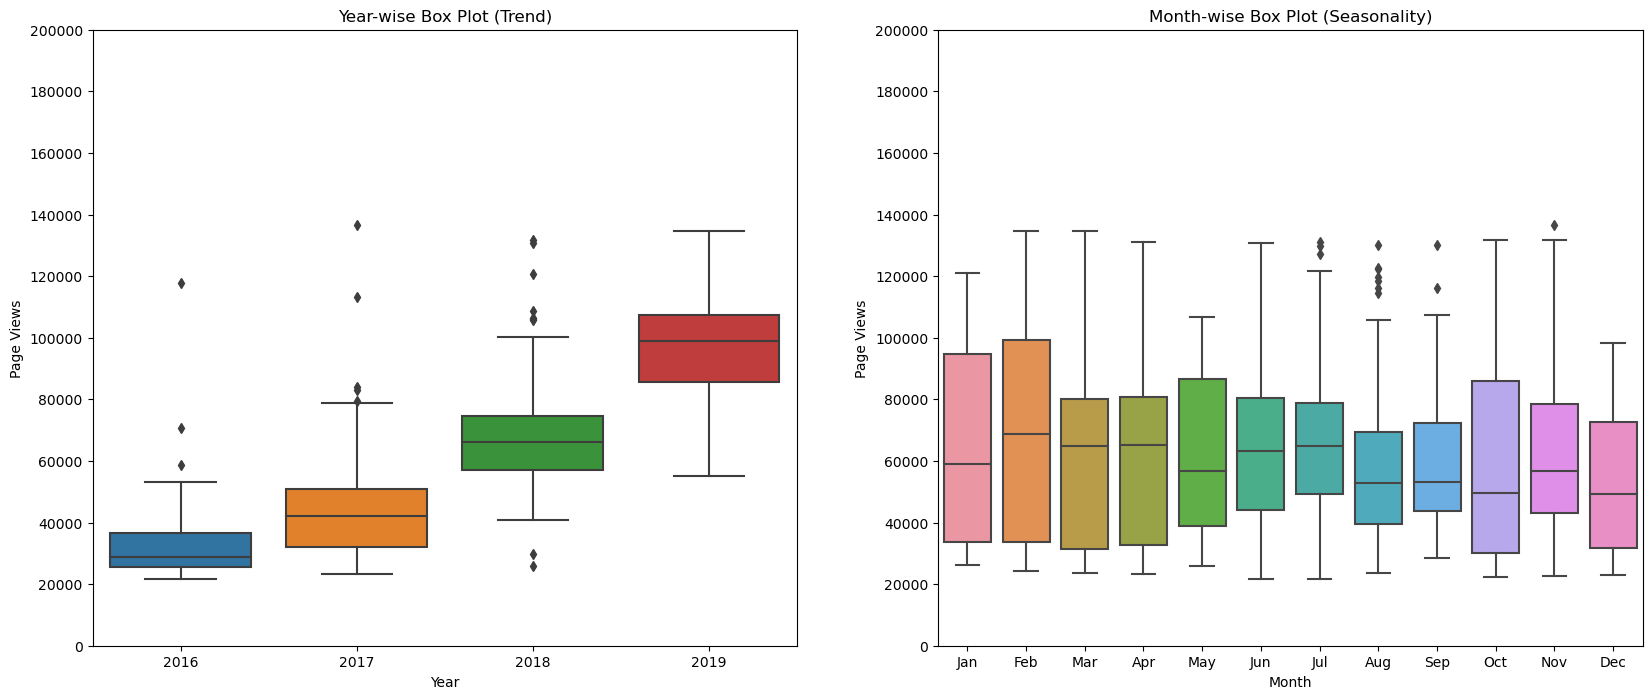

In [172]:
draw_box_plot()